# Advertising Sales Channel Prediction
#### Problem Statement:
######                                     Sales Channel Prediction Case Study  
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')


### Loading Dataset

In [2]:
df = pd.read_csv("Advertising.csv",  index_col="Unnamed: 0")
# Reading first 5 rows
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Above ,we are reading a dataset which contains the marketing with different methods like through tv,radio and newspaper.Sales column showing the sales based on these 3 marketing methods.

In [3]:
# Let's check the dimension or shape of our dataset.
print("Rows : Columns"+str(df.shape))

Rows : Columns(200, 4)


Our dataset contains `200 rows` and `4 columns`.

In [4]:
# Let's check the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


There are 4 columns or variables in our dataset ,all of 4 are float in nature with 0 null values.

In [5]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
# Checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

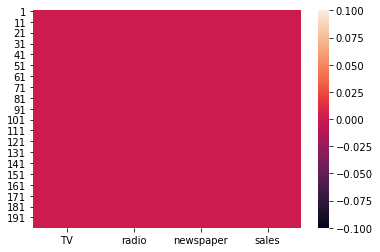

In [7]:
# Using heatmap for null values
sns.heatmap(df.isnull())

so there are no null values in our dataset.

In [8]:
# Checking feature descriptions
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From the features description we conclude that the mean and median of newspaper have some difference which means that there may be  some outliers presence, as we can see the 75th and 100th percentile have a huge differece.So there are outliers in newspaper.The standard distribution of TV is high which means data is widely spread.

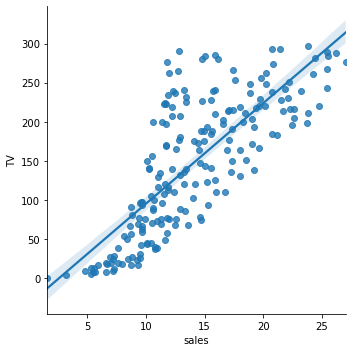

In [9]:
sns.lmplot(y='TV',x='sales',data=df)

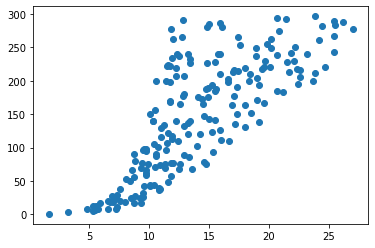

In [10]:
plt.scatter(y='TV',x='sales',data=df)

In the above plot between TV and Sales we can say that it is not the linear relationship. There is some exponential increase in the sales after the TV promotion of advertisement.

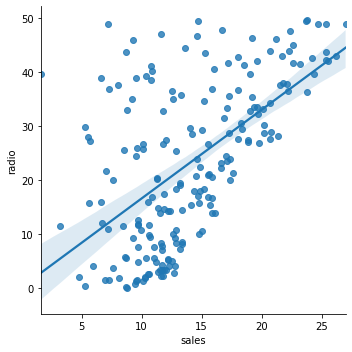

In [11]:
sns.lmplot(y='radio',x='sales',data=df)

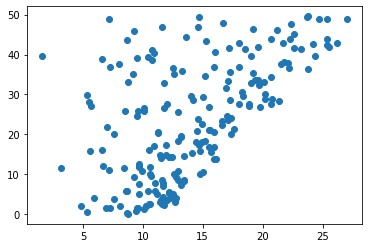

In [12]:
plt.scatter(y='radio',x='sales',data=df)

The relation between radio and sales is not so clear,we cannot say it proper positive relationship because the points in the graph are highly scattered from the linear regression line.

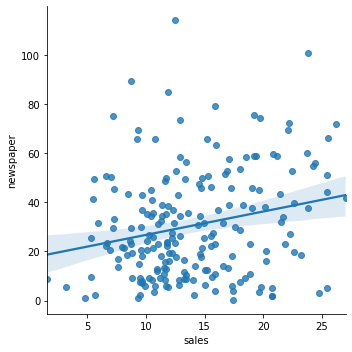

In [13]:
sns.lmplot(y='newspaper',x='sales',data=df)

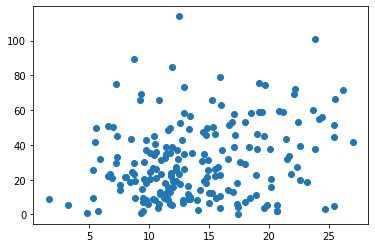

In [14]:
plt.scatter(y='newspaper',x='sales',data=df)

The graph of Newspaper and sales is representing that there is no relationship between them.So there is no effect of newspaper promotion method on the sales of the prodcut.

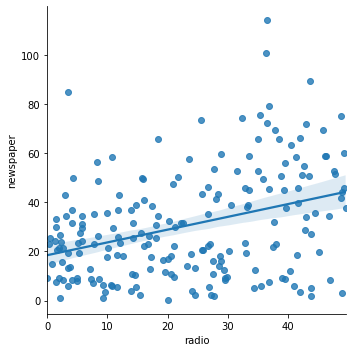

In [15]:
sns.lmplot(x='radio',y='newspaper',data=df)

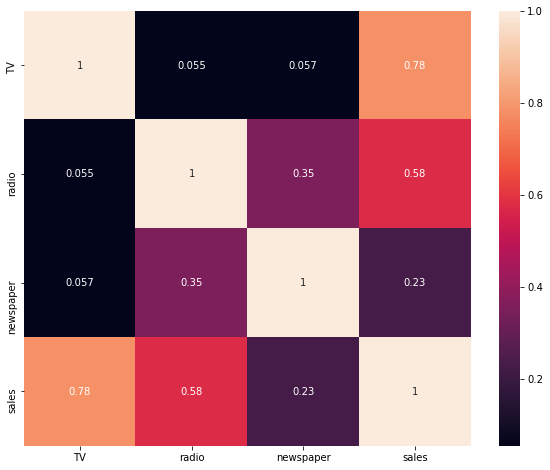

In [16]:
# cheking the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Using the correlation heatmap graph we can see that there is strong positive relationship between the TV type of promotion and Sales of product, which means that a positive change in TV promotion will increase the sales and vice-versa.

The relation between Radio type of promotion and Sales of product is also good.The relationship present between them is also positive.This will also have a good effect on the sales if promotion based on radio is done.

But the relationship between Newspaper type of promotion and Sales is not so much good.As there is a little positive change in the sales if promotion based on newspaper is done.

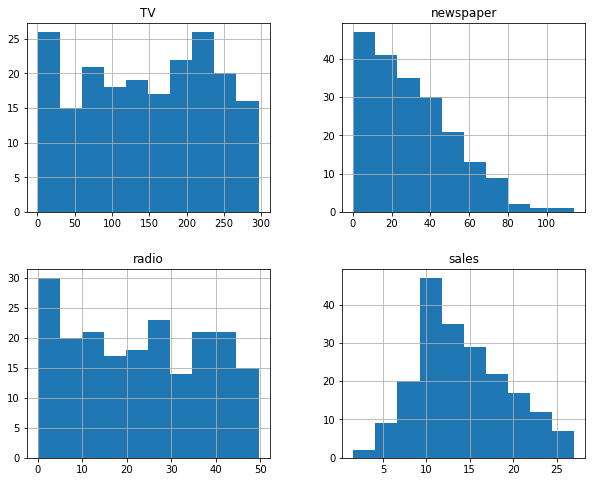

In [17]:
# Let's check the distribution of data in different variables
df.hist(figsize=(10,8))
plt.show()

Using the histogram plot we can say that there is some skewness presenst in the newspaper column.

### Cheking the outliers

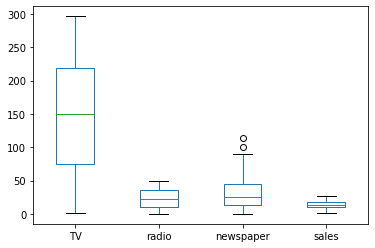

In [18]:
df.plot(kind='box')

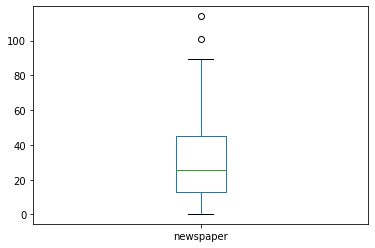

In [19]:
df['newspaper'].plot(kind='box')

The column `newspaper` contains 2 outliers.Let's check the values of outliers and see is there any need to treat them or not.

### Removing outliers

In [20]:
q3=df['newspaper'].quantile(0.75)
q1=df['newspaper'].quantile(0.25)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
new_df=df[~((df['newspaper'] < lb) | (df['newspaper'] > ub))]

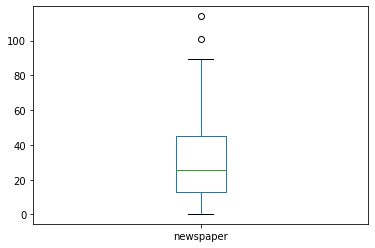

In [21]:
df['newspaper'].plot(kind='box')

As we can see that using the outlier technique outliers are not remmoved,it means that they are in our thresholds value which will not have major effect on our model prediction.

In [22]:
# Checking the skewness in the dataset
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [23]:
# Treating the skewness from the dataset.
from sklearn.preprocessing import PowerTransformer
df1=df.copy(deep=True)
pt=PowerTransformer(standardize=False)
df=pt.fit_transform(df1)
df=pd.DataFrame(df,columns=df1.columns)
df

,TV,radio,newspaper,sales
0,72.556012,13.912597,10.609276,8.090917
1,21.072571,14.281120,8.653385,4.972447
2,10.091567,15.844129,10.616442,4.612908
3,53.125623,14.764440,9.802647,7.232999
4,60.624315,5.822137,9.794700,5.733438
...,...,...,...,...
195,18.748747,2.593392,4.695973,4.019673
196,37.200097,3.229034,3.459337,4.745643
197,59.671050,5.222332,2.998961,5.704298
198,84.757386,14.931530,10.391292,8.845145


In [24]:
df.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
sales       -0.007841
dtype: float64

We have successfully removed the skewness from the dataset.

### Separating independent and dependent variables

In [25]:
x=df.drop(['sales'],axis=1)
y=df['sales']

In [26]:
print("Dimension of independent variables :",x.shape)
print("Dimension of dependent variables : ",y.shape)

Dimension of independent variables : (200, 3)
Dimension of dependent variables :  (200,)


### Separating data for training and testing

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [28]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
mean_squared_error(y_test,y_pred)

0.22649847996304354

In [29]:
# Testing options and evaluation metrics
num_folds=10
scoring="neg_mean_squared_error"

In [30]:
# Spot check algorithims
models=[]
models.append(("LR",LinearRegression()))
models.append(('LS',Lasso()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("DTR",DecisionTreeRegressor()))

results = []
names = []

for name,model in models:
    kfold=KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)                     

LR: -0.214363 (0.232826)
LS: -0.258856 (0.209893)
KNN: -0.130708 (0.119172)
DTR: -0.135376 (0.055310)


In above result we find that DecisionTreeRegressor is giving better results with less standard deviation.So Let's check it using the graph after that we will hypertunne its parameters for better accuracy of result.

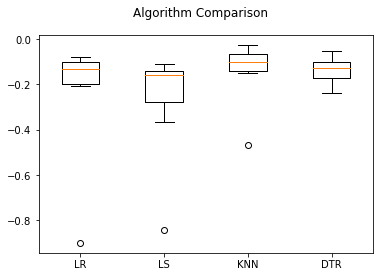

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Build parameter grid
criterion=['mse']
splitter=['best','random']
min_samples_split=[2,3,4]
min_samples_leaf=[1,2,3,4]
min_weight_fraction_leaf=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
max_features = ["auto", "sqrt", "log2"]
param_grid=dict(criterion=criterion, splitter=splitter,
                min_weight_fraction_leaf=min_weight_fraction_leaf,
                max_features=max_features, min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf)


# Build the model
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)

# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Best: -0.118366 using {'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [34]:
model = DecisionTreeRegressor(criterion= 'mse', max_features= 'auto', min_samples_leaf= 1, min_samples_split= 4, min_weight_fraction_leaf= 0.0, splitter= 'best')

In [35]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_features='auto', min_samples_split=4)

In [36]:
pred=model.predict(x_test)

In [37]:
model.score(x_test,y_test)

0.9380016757272849

In [38]:
mean_squared_error(y_test,pred)

0.13317773283231665

In [39]:
r2_score(y_test,pred)

0.9380016757272849

In [40]:
score=cross_val_score(model,x,y,cv=7)
print(score.mean())
print(score.std())

0.9443190646196472
0.023010008104866843


## Saving model

In [41]:
import joblib
filename="dtc.obj"
joblib.dump(model,filename)

['dtc.obj']

In [42]:
loaded_model=joblib.load(filename)

In [43]:
loaded_model

DecisionTreeRegressor(max_features='auto', min_samples_split=4)

In [44]:
result=loaded_model.score(x_test,y_test)

In [45]:
print(result)

0.9380016757272849


## Conclusion

In [46]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [47]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,7.331548,8.294669,7.169478,4.388393,8.294669,5.791232,8.294669,4.767474,5.704298,6.750121,...,6.194105,5.689579,4.388393,4.388393,4.409128,5.285177,5.366643,8.503047,3.708425,5.285409
Original,6.827935,8.159476,7.929304,3.909443,8.671972,5.645720,8.136669,4.305105,5.316043,6.296882,...,6.214579,5.376967,3.872286,3.644724,4.646315,5.161699,5.130471,8.823633,4.019673,5.376967


We can conclude that our predicted sales is somehow close to the original result.As there is almost 94% accuracy in our model,so it is giving closely related result.